## K-means clustering

Unsupervised method

- Initialize $k$ cluster centers

- Associations: Find the points closest to each cluster center and form groups
- Recalculate means: Set the cluster center to the mean of each group

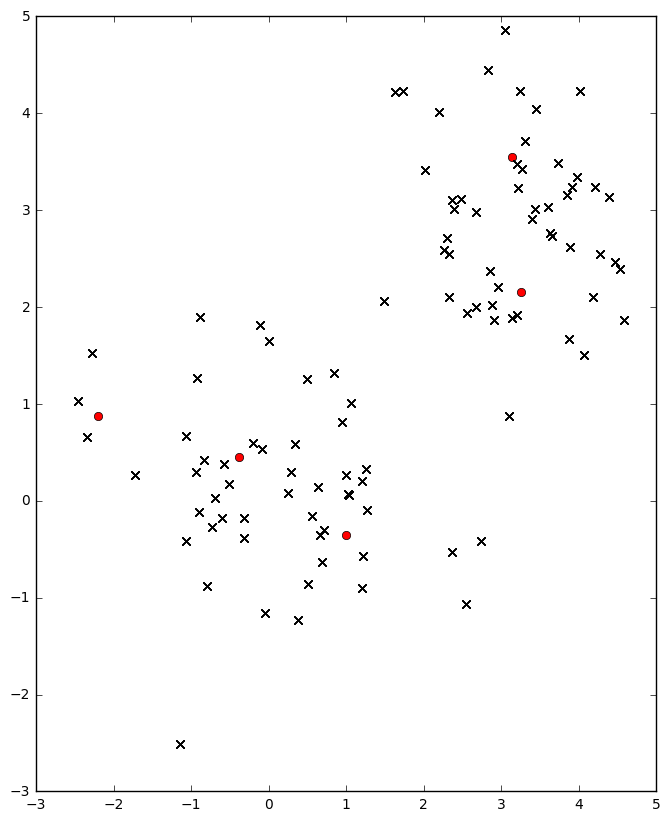

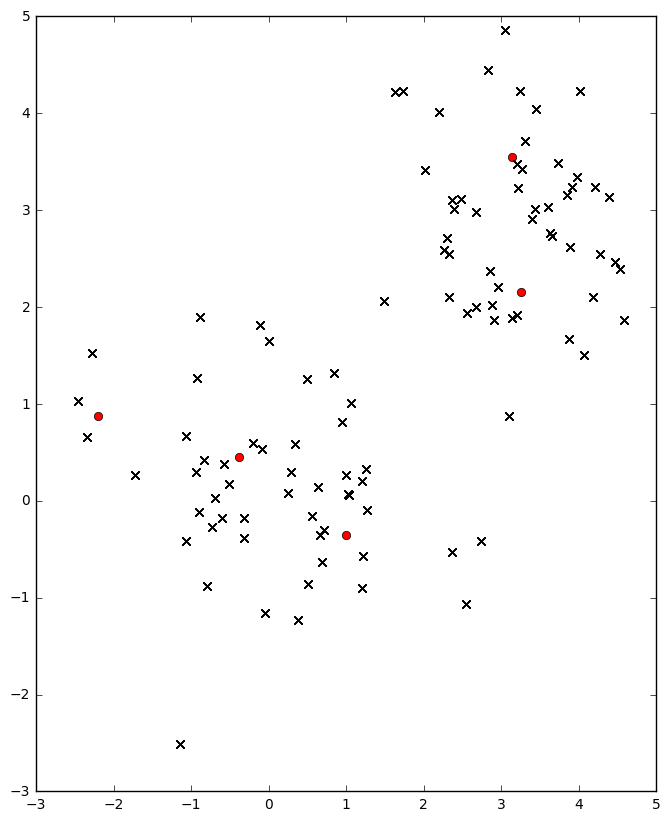

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from IPython import display
import matplotlib.pylab as plt

import time
from IPython import display

N = 100
D = 2

# Generate a data set
X1 = np.random.randn(D,N/2)
X2 = 0.8*np.random.randn(D,N/2) + 3*np.ones((D, N/2))
X = np.hstack((np.mat(X1), np.mat(X2)))

K = 5;

mu = X[:,0:K]
#plt.plot(mu[0,:],mu[1,:],'ro')

# Number of epochs
EP = 20

fig = plt.figure(figsize=(8,10))
plt.plot(X[0,:], X[1,:],'kx')

ax = fig.gca()
ln = plt.Line2D(xdata=mu[0,:], ydata=mu[1,:], marker='o', color='r',linestyle=None,linewidth=0)
ax.add_line(ln)

for e in range(EP):
    
    dist = np.zeros((N,K))
    for i in range(N):
        for c in range(K):
            err = X[:,i]-mu[:,c]
            dist[i,c] = float(err.T*err)
    
    # Assignments
    a = np.argmin(dist, axis=1)
    
    mu = np.mat(np.zeros((D,K)))
    count = np.zeros((K))
    for i,c in enumerate(a):
        count[c] += 1
        mu[:,c] = (count[c]-1)/count[c]*mu[:,c] + 1./count[c]*X[:,i]
    
    ln.set_xdata(mu[0,:])
    ln.set_ydata(mu[1,:])
    
    #plt.subplot(EP,1,e+1)
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.1)
    plt.plot(X[0,:], X[1,:],'kx')
    #plt.plot(mu[0,:],mu[1,:],'ro')

plt.show()
    
    